###DATA COMPREHENSION

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning 23 24/Data/machine_failures_train.csv')

In [3]:
df

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Machine Learning 23 24/Data/machine_failures_test.csv')

In [ ]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [ ]:
df['TWF'].unique()

array([0, 1])

In [24]:
df.dtypes

id                           int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [ ]:
correlation_matrix = df.corr()

<ipython-input-6-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


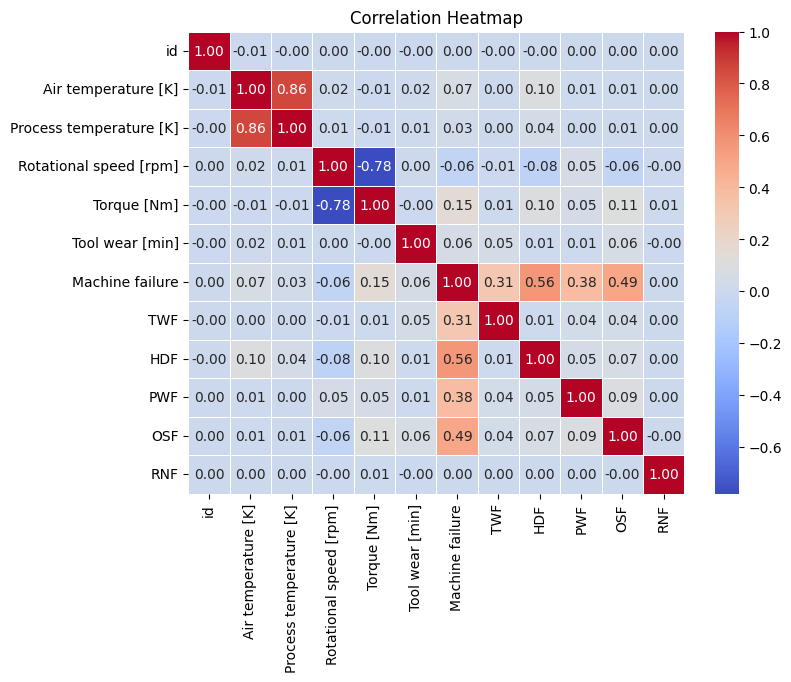

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
(df['Machine failure']==1).sum()/len(df)

0.01574445315878589

Significant lack of data on failures

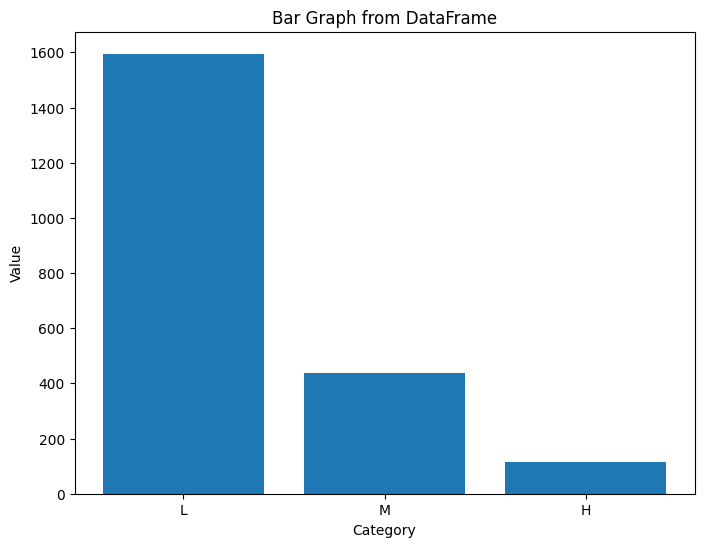

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

num_failures = []

for i in df['Type'].unique():
  df_temp = df[df['Type'] == i]
  failures = (df_temp['Machine failure'] == 1).sum()
  num_failures.append(failures)



# Use the DataFrame columns to define the x and y values for the bar graph
plt.bar(df['Type'].unique(), num_failures)



plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Bar Graph from DataFrame')
plt.show()

In [ ]:
df['Type'].value_counts()

L    95354
M    32152
H     8923
Name: Type, dtype: int64

Distribution heavily favors L, therefore no incredibly obvious trend for different types of machines fail more often.

Along with that, data on H machines is limited and may be difficult for the model to accurately predict

###Basic Model

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

In [40]:
cols = ['Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Type']

In [42]:
X = df[cols]
y = df['Machine failure']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 3)

In [8]:
logreg = LogisticRegression(solver ='liblinear', random_state =3)

In [ ]:
#logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)

In [ ]:
#accuracy = accuracy_score(y_test, y_pred)
#print(accuracy)

0.9840699748344695


Important note
- since submission data wants probability of failure, predict_proba is more applicable than utilizing standard predict

In [44]:
ohe = OneHotEncoder()
ct = make_column_transformer(
    (ohe, ['Type']),
    remainder = 'passthrough'
)

Model now utilizes type of machine

In [45]:
pipe = make_pipeline(ct, logreg)

In [46]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Type'])])),
                ('logisticregression',
                 LogisticRegression(random_state=3, solver='liblinear'))])

In [47]:
y_pred = pipe.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9846563561289061


In [ ]:
(y_train==1).sum()

1503

Next step is to attempt to balance class with the assistance of mr gpt

In [87]:
model = xgb.XGBClassifier(
    n_estimators = 100,
    max_depth = 11,
    scale_pos_weight=sum(y_train == 0) / sum(y_train == 1))

# Train the model on the training set
pipe_xg = make_pipeline(ct, model)
pipe_xg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipe_xg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)








Accuracy: 0.9833369982164235
Confusion Matrix:
 [[39946   338]
 [  344   301]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     40284
           1       0.47      0.47      0.47       645

    accuracy                           0.98     40929
   macro avg       0.73      0.73      0.73     40929
weighted avg       0.98      0.98      0.98     40929



In [86]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
scores = cross_val_score(pipe_xg, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.9828117  0.98127245 0.98270175 0.98240856 0.98167491]
Mean Accuracy: 0.9821738743305207


Submission 1

- no kaggle submission

In [ ]:
#pipe_final_1 = make_pipeline(ct, logreg)

In [ ]:
#pipe_final_1.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Type'])])),
                ('logisticregression',
                 LogisticRegression(random_state=3, solver='liblinear'))])

In [ ]:
#X_test = df_test[cols]

In [ ]:
#y_pred_final = pipe_final_1.predict_proba(X_test)

In [ ]:
#y_pred_final

array([[0.99506128, 0.00493872],
       [0.9984866 , 0.0015134 ],
       [0.99239627, 0.00760373],
       ...,
       [0.98993426, 0.01006574],
       [0.99298476, 0.00701524],
       [0.99540744, 0.00459256]])

In [ ]:
#kaggle_col = []
#for i in range(len(y_pred_final)):
#  kaggle_col.append(y_pred_final[i][0])

In [ ]:
#kaggle_1 = pd.DataFrame(data = {'id':df_test['id'], 'Machine failure':kaggle_col})

In [ ]:
#kaggle_1.to_csv('/content/drive/MyDrive/Machine Learning 23 24/Data/mf_1.csv')